# Task-1   :  House Price Prediction 

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [12]:
the_housing_df = pd.read_csv("C:/Users/thema/OneDrive/Desktop/Bharat Intern/Housing.csv")

In [14]:
# lets check the data set by accessing the first five rows of dataset
the_housing_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
# lets know the structure of data
the_housing_df.shape

(545, 13)

# so there are 545 rows and 13 columns in our data . 


In [20]:
the_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Preparing the data

In [21]:
the_housing_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
# dropping the null values from the dataset
the_housing_df.dropna(inplace = True)

In [23]:
the_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [44]:
# Converting categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
the_housing_df[cat] = the_housing_df[cat].apply(le.fit_transform)

In [45]:
the_housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# Training


In [46]:
from sklearn.model_selection import train_test_split


In [51]:
x = the_housing_df.drop(['price'],axis=1)

y = the_housing_df['price']

# developing the relationship between the variables . As the all other facilities
# depends on the factor price , it is dependent

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Model


In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
prediction = lr.predict(x_test)

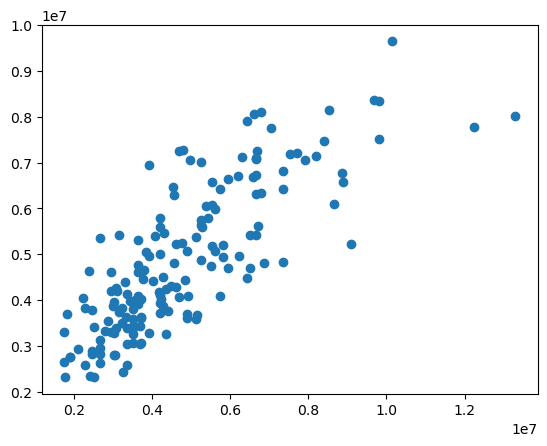

In [67]:
plt.scatter(y_test,prediction)


In [68]:
from sklearn import metrics

In [70]:
Absolute_error = metrics.mean_absolute_error(y_test,prediction)
Absolute_error

925543.5483156563

In [71]:
Squared_error = metrics.mean_squared_error(y_test,prediction)
Squared_error

1535047758428.0503

In [72]:
import numpy as np


In [75]:
Root_Mean_Squared_error = np.sqrt(metrics.mean_squared_error(y_test,prediction))
Root_Mean_Squared_error                                  
                                  

1238970.442919463

In [76]:
R2score = metrics.r2_score(y_test,prediction)
R2score

0.6435419628959106